In [116]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [117]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [118]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [119]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [120]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [121]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [122]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [123]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [124]:
# Find the most recent date in the data set.
recent_date = engine.execute('SELECT MAX(date) FROM measurement').fetchall()
#recent_date = datetime.strptime(recent_date_query[0][0], '%Y-%M-%d')
recent_date

[('2017-08-23',)]

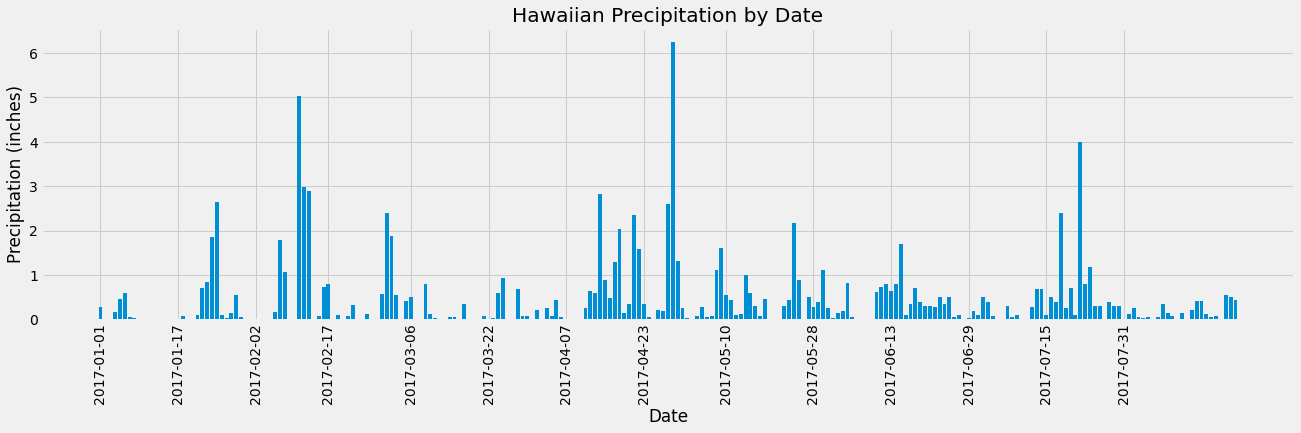

In [197]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-8-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_data, columns=['date', 'prcp']) 
df = df.set_index('date')
# Sort the dataframe by date
df = df.sort_index()
#df = df.drop_duplicates()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,5))
plt.bar(df.index, df['prcp']);
plt.xticks(rotation = 90);
plt.xticks(df.index[::100]);
plt.title('Hawaiian Precipitation by Date');
plt.xlabel('Date');
plt.ylabel('Precipitation (inches)');

In [198]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


# Exploratory Station Analysis

In [211]:
# Design a query to calculate the total number stations in the dataset
station_unique_count = engine.execute('SELECT COUNT(DISTINCT(station)) FROM measurement').fetchall()

station_unique_count

[(9,)]

In [212]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = engine.execute('SELECT station, COUNT(station) FROM measurement GROUP BY station ORDER BY COUNT(station) DESC').fetchall()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [214]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_stats_query = '''
SELECT MIN(tobs), MAX(tobs), AVG(tobs)
FROM measurement
WHERE station = 'USC00519281'
'''

active_station_stats = engine.execute(active_station_stats_query).fetchall()
active_station_stats

[(54.0, 85.0, 71.66378066378067)]

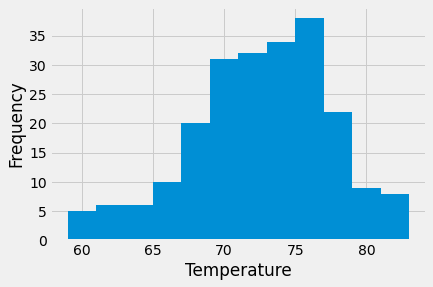

In [245]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
filter(Measurement.station == 'USC00519281',
      Measurement.date >= '2016-8-23').all()

df = pd.DataFrame(temperature_data, columns=['date', 'tobs', 'station'])
df = df.set_index('date')
df = df.sort_index()

plt.hist(df['tobs'], bins=12);
plt.xlabel('Temperature');
plt.ylabel('Frequency');

# Close session

In [246]:
# Close Session
session.close()